Steigung ohne Zusatzmasse a1: 0.42143109443595383
Steigung mit Zusatzmasse a1': 0.20681051856835228


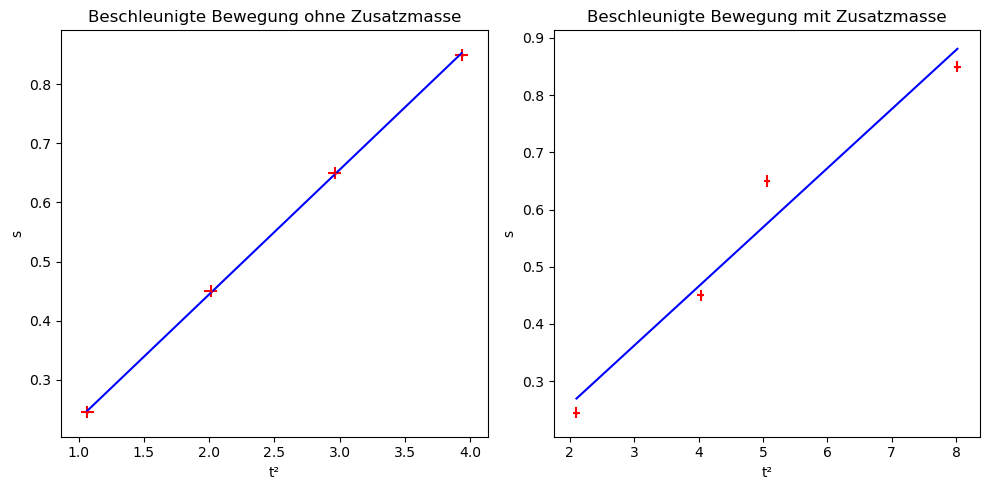

In [38]:
#Bibliotheken

import numpy as np
import matplotlib.pyplot as plt

from sympy import symbols, Eq, solve, simplify

#Bestimmung der Steigung und Plots mit Fehlerbalken
###################################################

#Abstände Lichtschranken
distance= np.array([0.245, 0.45, 0.65, 0.85])

#Daten für mW ohne Zusatzmasse
time_mw = np.array([1.032, 1.419, 1.721, 1.984])
# Zeiten quadrieren
time_sq_mw = np.square(time_mw)

#Daten für mW mit Zusatzmasse
time_mwZ = np.array([1.451, 2.008, 2.251, 2.832])
# Zeiten quadrieren
time_sq_mwZ = np.square(time_mwZ)

# Lineare Regression der s-t^2-Geraden ohne Zusatzmasse
coeff_lin_mw = np.polyfit(time_sq_mw, distance, 1)
poly_fit_lin_mw = np.poly1d(coeff_lin_mw)

# Steigung der Regressionsgeraden ohne Zusatzmasse
steigung_mw = 2*coeff_lin_mw[0]
print("Steigung ohne Zusatzmasse a1:", steigung_mw)

# Lineare Regression der s-t^2-Geraden mit Zusatzmasse
coeff_lin_mwZ = np.polyfit(time_sq_mwZ, distance, 1)
poly_fit_lin_mwZ = np.poly1d(coeff_lin_mwZ)

# Steigung der Regressionsgeraden mit Zusatzmasse
steigung_mwZ = 2*coeff_lin_mwZ[0]
print("Steigung mit Zusatzmasse a1':", steigung_mwZ)

#Fehlerbalken
time_sq_mw_err = 0.05
time_sq_mwZ_err = 0.05
distance_err = 0.01

# Erstelle zwei separate Plots
plt.figure(figsize=(10, 5))

# Plot für time_mw

plt.subplot(1, 2, 1)
plt.errorbar(time_sq_mw, distance, xerr=time_sq_mw_err, yerr=distance_err, fmt='o', color='red', markersize=1) #Daten mit Fehlerbalken
plt.plot(time_sq_mw, poly_fit_lin_mw(time_sq_mw), color='blue') #Regressionsgerade
plt.title('Beschleunigte Bewegung ohne Zusatzmasse')
plt.xlabel('t²')
plt.ylabel('s')



# Plot für time_mwZ
plt.subplot(1, 2, 2)
plt.plot(time_sq_mwZ, poly_fit_lin_mwZ(time_sq_mwZ), color='blue') #Regressionsgerade
plt.errorbar(time_sq_mwZ, distance, xerr=time_sq_mwZ_err, yerr=distance_err, fmt='o', color='red', markersize=1) #Daten mit Fehlerbalken
plt.title('Beschleunigte Bewegung mit Zusatzmasse')
plt.xlabel('t²')
plt.ylabel('s')


# Zeige die Plots an
plt.tight_layout()
plt.show()




In [39]:
#Berechnung der Wagenmasse
##########################

from sympy import symbols, Eq, solve

# Definiere die Symbole
mW, mu, a1, a1Z, g, m2, mZ = symbols('mW mu a1 a1Z g m2 mZ')

# Gleichung für die Wagenmasse
gleichung = Eq(mW**2 + mW*m2/4 + mW*mZ -m2*mZ*a1/(4*a1Z-4*a1) + m2*mZ*g/(2*a1Z-2*a1), 0)

# Setze Werte ein
werte = {g: 9.81, m2: 0.03563, mZ: 0.39744}
werte[a1] = steigung_mw  # Steigung ohne Zusatzmasse
werte[a1Z] = steigung_mwZ  # Steigung mit Zusatzmasse

eq_werte = gleichung.subs(werte)
loesung_mW = solve(eq_werte, mW)

print("Lösung für mW:", loesung_mW)

Lösung für mW: [-0.801473579741690, 0.395126079741690]


In [40]:
#Berechnung des Reibungskoeffizienten
#####################################

from sympy import  symbols, Eq, solve

# Definiere die Symbole
mW, mu, a1, g, m2= symbols('mW mu a1 g m2')

mW = loesung_mW[1]
print(mW)
# Gleichung für den Reibungskoeffizient
gleichung_mu = Eq(mu*mW*g + mW*a1 + m2*a1/4 - m2*g/2, 0)
# Setze Werte ein
werte_mu = {g: 9.81, m2: 0.03563}
werte_mu[a1] = steigung_mw  # Steigung ohne Zusatzmasse
werte_mu[mW] = loesung_mW[1]  # Wagenmasse 
eq_werte_mu = gleichung_mu.subs(werte_mu)
loesung_mu = solve(eq_werte_mu, mu)
print(steigung_mw, loesung_mW[1])
print("Lösung für mu:", loesung_mu)

0.395126079741690
0.42143109443595383 0.395126079741690
Lösung für mu: [0.00115908661873400]


In [41]:
#Berechnung der Standardabweichung der Beschleunigung
#####################################################


# Berechne a für jedes Wertepaar
a1 = distance * 2 / time_sq_mw
a1Z = distance * 2 / time_sq_mwZ

print(a1)
print(a1Z)

# Standardabweichung von a1 berechnen
stabw_a1 = np.std(a1)
stabw_a1Z = np.std(a1Z)

print("Standardabweichung von a1:", stabw_a1)
print("Standardabweichung von a1Z:", stabw_a1Z)

[0.46008353 0.44696932 0.4389162  0.43188248]
[0.23273476 0.22321074 0.25656202 0.21196415]
Standardabweichung von a1: 0.01047996969333265
Standardabweichung von a1Z: 0.016427160921320745
